In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Colab_me

/content/drive/MyDrive/Colab_me


In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import warnings

warnings.filterwarnings("ignore")
sns.set_style()
plt.style.use('seaborn')

In [5]:
df = pd.read_csv('/content/drive/MyDrive/DS105/source/dataset/FIFA22_official_data_clean_final.csv')

In [6]:
df.iloc[:,16:49] = df.iloc[:,16:49].astype(int)

# Data preparation

In [7]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,212198,Bruno Fernandes,26,Portugal,82,86,Manchester United,107500000.0,250000.0,2131,...,65,12,14,15,8,14,CAM,84.0,€206.9M,72.0
1,209658,L. Goretzka,26,Germany,82,86,FC Bayern München,93000000.0,140000.0,2131,...,77,13,8,15,11,9,CM,84.0,€160.4M,74.0
2,176580,L. Suárez,34,Uruguay,82,86,Atlético de Madrid,44500000.0,135000.0,2131,...,38,15,15,15,15,16,ST,84.0,€91.2M,42.0
3,192985,K. De Bruyne,30,Belgium,82,86,Manchester City,125500000.0,350000.0,2131,...,53,15,13,5,10,13,CM,84.0,€232.2M,68.0
4,224334,M. Acuña,29,Argentina,82,84,Sevilla FC,37000000.0,45000.0,2131,...,82,8,14,13,13,14,LB,84.0,€77.7M,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15846,259718,F. Gebhardt,19,Germany,52,66,FC Basel 1893,170000.0,650.0,803,...,10,53,45,47,52,57,GK,52.0,€361K,6.0
15847,251433,B. Voll,20,Germany,58,69,F.C. Hansa Rostock,375000.0,950.0,802,...,10,59,60,56,55,61,GK,58.0,€656K,5.0
15848,262846,�. Dobre,20,Romania,53,63,FC Academica Clinceni,180000.0,550.0,778,...,12,57,52,53,48,58,GK,53.0,€279K,5.0
15849,241317,21 Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,100000.0,700.0,770,...,9,49,48,45,38,52,GK,47.0,€223K,21.0


## Lấy các cầu thủ theo nhóm
### Chờ phân tích thử các chỉ số cá nhân

In [8]:
df['GeneralPosition'] = ''
for i in range(df.shape[0]):
  if df['Best Position'][i] in ['ST', 'LW', 'RW', 'CF']:
    df['GeneralPosition'][i] = 'ST'
  elif df['Best Position'][i] in ['CM', 'CDM', 'CAM', 'RM', 'LM']:
    df['GeneralPosition'][i] = 'CM'
  elif df['Best Position'][i] in ['CB', 'RB', 'LB', 'RWB', 'LWB']:
    df['GeneralPosition'][i] = 'CB'
  elif df['Best Position'][i] == 'GK':
    df['GeneralPosition'][i] = 'GK'

In [9]:
# Lấy df của các nhóm cầu thủ
df_ST = df[df['GeneralPosition'] == 'ST']
df_CM = df[df['GeneralPosition'] == 'CM']
df_CB = df[df['GeneralPosition'] == 'CB']
df_GK = df[df['GeneralPosition'] == 'GK']

In [10]:
df_ST.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,GeneralPosition
2,176580,L. Suárez,34,Uruguay,82,86,Atlético de Madrid,44500000.0,135000.0,2131,...,15,15,15,15,16,ST,84.0,€91.2M,42.0,ST
28,158023,L. Messi,34,Argentina,82,86,Paris Saint-Germain,78000000.0,320000.0,2131,...,6,11,15,14,8,RW,84.0,€144.3M,20.0,ST
30,205632,L. Ocampos,26,Argentina,82,83,Sevilla FC,39500000.0,46000.0,2131,...,11,8,15,12,7,LW,83.0,€83M,58.0,ST
32,188545,R. Lewandowski,32,Poland,82,86,FC Bayern München,119500000.0,270000.0,2131,...,15,6,12,8,10,ST,84.0,€197.2M,35.0,ST
33,209331,M. Salah,29,Egypt,82,86,Liverpool,101000000.0,270000.0,2131,...,14,14,9,11,14,RW,84.0,€186.9M,38.0,ST


In [11]:
df_CM.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,GeneralPosition
0,212198,Bruno Fernandes,26,Portugal,82,86,Manchester United,107500000.0,250000.0,2131,...,12,14,15,8,14,CAM,84.0,€206.9M,72.0,CM
1,209658,L. Goretzka,26,Germany,82,86,FC Bayern München,93000000.0,140000.0,2131,...,13,8,15,11,9,CM,84.0,€160.4M,74.0,CM
3,192985,K. De Bruyne,30,Belgium,82,86,Manchester City,125500000.0,350000.0,2131,...,15,13,5,10,13,CM,84.0,€232.2M,68.0,CM
5,212622,J. Kimmich,26,Germany,82,86,FC Bayern München,108000000.0,160000.0,2131,...,8,15,7,15,15,CDM,84.0,€186.3M,85.0,CM
6,187961,Paulinho,32,Brazil,82,83,Al Ahli,28500000.0,61000.0,2131,...,15,15,11,6,8,CM,83.0,€48.5M,80.0,CM


In [12]:
df_CB.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,GeneralPosition
4,224334,M. Acuña,29,Argentina,82,84,Sevilla FC,37000000.0,45000.0,2131,...,8,14,13,13,14,LB,84.0,€77.7M,80.0,CB
11,155862,Sergio Ramos,35,Spain,82,86,Paris Saint-Germain,24000000.0,115000.0,2131,...,11,8,9,7,11,CB,84.0,€44.4M,84.0,CB
12,197445,D. Alaba,29,Austria,82,84,Real Madrid CF,35500000.0,195000.0,2131,...,5,7,14,15,9,CB,84.0,€72.8M,86.0,CB
15,212462,Alex Telles,28,Brazil,82,82,Manchester United,27500000.0,130000.0,2131,...,13,8,12,11,14,LB,82.0,€50.9M,77.0,CB
18,193082,J. Cuadrado,33,Colombia,82,83,Juventus,19000000.0,95000.0,2131,...,5,5,13,6,9,RB,83.0,€31.4M,75.0,CB


In [13]:
df_GK.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,GeneralPosition
9649,210257,Ederson,27,Brazil,82,86,Manchester City,94000000.0,200000.0,1583,...,15,15,15,15,16,GK,84.0,€181M,29.0,GK
10654,167495,M. Neuer,35,Germany,82,86,FC Bayern München,13500000.0,86000.0,1534,...,15,15,15,15,16,GK,84.0,€22.3M,17.0,GK
10706,163301,J. Orozco,35,Mexico,75,75,Club Tijuana,625000.0,10000.0,1531,...,15,15,15,15,16,GK,75.0,€1.1M,29.0,GK
11314,204935,J. Pickford,27,England,82,85,Everton,33000000.0,83000.0,1495,...,15,15,15,15,16,GK,83.0,€65.2M,21.0,GK
11371,226753,21 A. Onana,24,Cameroon,82,86,Ajax,48000000.0,18000.0,1490,...,15,15,15,15,16,GK,84.0,€70.8M,12.0,GK


## Lấy các thuộc tính theo từng nhóm cầu thủ

In [14]:
# Nhóm thuộc tính 
attacking = ['Crossing', 'Finishing', 'ShortPassing', 'Volleys']  #4
skill = ['Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl']  #5
movement = ['Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance'] #5
power = ['ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots']  #5
mentality = ['Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure']  #6
defending = ['StandingTackle', 'SlidingTackle']  #2
goalkeeping = ['GKDiving', 'GKKicking', 'GKPositioning', 'GKReflexes']  #4

In [15]:
df_ST_train = df_ST[defending + power + movement + skill + attacking]
df_ST_train

,StandingTackle,SlidingTackle,ShotPower,Jumping,Stamina,Strength,LongShots,Acceleration,SprintSpeed,Agility,...,Balance,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Crossing,Finishing,ShortPassing,Volleys
2,45,38,89,69,78,85,88,76,69,75,...,78,83,86,82,77,86,80,93,81,90
28,35,24,86,68,72,69,94,91,80,91,...,95,86,93,94,91,88,85,95,81,88
30,61,55,84,80,91,81,80,80,82,79,...,61,85,80,65,72,84,79,86,80,81
32,42,19,90,85,76,86,87,77,79,77,...,82,85,79,85,70,88,71,95,81,89
33,43,41,82,69,85,75,84,89,91,91,...,91,86,83,69,75,88,79,91,81,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13297,17,13,49,64,58,49,44,70,70,55,...,57,46,33,26,27,48,34,45,39,38
13362,14,11,48,50,50,40,41,69,67,72,...,73,42,36,34,33,45,29,49,38,34
13384,18,16,45,36,35,34,38,67,67,73,...,75,51,40,37,35,51,45,50,43,40
13448,24,23,61,33,32,34,34,67,66,61,...,60,48,37,31,35,52,40,52,44,41


In [16]:
df_CM_train = df_CM[defending + mentality + movement + skill + attacking]
df_CM_train

,StandingTackle,SlidingTackle,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Acceleration,SprintSpeed,...,Balance,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Crossing,Finishing,ShortPassing,Volleys
0,73,65,78,66,87,90,91,84,77,73,...,79,83,87,87,88,87,87,83,81,87
1,85,77,81,86,85,84,60,82,78,83,...,71,84,76,75,84,87,75,82,81,69
3,65,53,76,66,88,94,83,84,76,76,...,78,86,85,83,93,88,94,82,81,82
5,85,79,89,84,80,85,44,84,77,65,...,84,83,85,61,90,85,91,68,81,69
6,79,75,81,80,83,82,71,81,73,71,...,85,82,66,75,76,83,67,83,81,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13186,17,12,35,12,53,49,42,45,70,66,...,58,51,39,33,26,49,51,50,47,41
13193,31,29,47,32,49,47,32,43,63,66,...,58,40,31,30,48,44,33,33,51,34
13210,31,28,41,19,41,47,42,49,63,65,...,79,50,41,32,44,48,45,40,46,42
13225,24,29,38,18,45,44,45,46,50,56,...,64,53,39,37,32,50,46,45,46,42


In [17]:
df_CB_train = df_CB[defending + mentality]
df_CB_train

,StandingTackle,SlidingTackle,Aggression,Interceptions,Positioning,Vision,Penalties,Composure
4,84,82,84,79,81,82,76,84
11,89,91,90,87,73,71,92,84
12,83,82,74,85,73,78,79,84
15,78,76,76,79,75,78,81,77
18,80,83,78,73,75,72,65,74
...,...,...,...,...,...,...,...,...
13610,52,48,55,47,29,34,36,40
13618,50,46,40,45,26,31,30,35
13674,53,50,48,54,20,26,31,36
13690,53,54,41,45,22,30,31,38


In [18]:
df_GK_train = df_GK[goalkeeping + power]
df_GK_train

,GKDiving,GKKicking,GKPositioning,GKReflexes,ShotPower,Jumping,Stamina,Strength,LongShots
9649,15,15,15,16,70,66,41,78,18
10654,15,15,15,16,68,77,43,80,16
10706,15,15,15,16,61,84,45,75,18
11314,15,15,15,16,65,77,45,70,13
11371,15,15,15,16,65,80,39,79,17
...,...,...,...,...,...,...,...,...,...
15846,53,47,52,57,35,50,18,61,5
15847,59,56,55,61,42,22,21,67,8
15848,57,53,48,58,40,35,24,32,6
15849,49,45,38,52,34,51,20,51,8


## Lọc ra các thuộc tính có mức độ tương quan mạnh với nhau theo từng nhóm

In [19]:
# điều kiện 1 trong 2: có tương quan mạnh với nhau (>0.75) và thuộc tính đó ít tương quan tới thuộc tính khác
df_ST_train = df_ST_train.drop(['SlidingTackle','LongShots','Acceleration', 'BallControl', 'Finishing', 'ShortPassing'], axis=1)
df_ST_train

,StandingTackle,ShotPower,Jumping,Stamina,Strength,SprintSpeed,Agility,Reactions,Balance,Dribbling,Curve,FKAccuracy,LongPassing,Crossing,Volleys
2,45,89,69,78,85,69,75,81,78,83,86,82,77,80,90
28,35,86,68,72,69,80,91,81,95,86,93,94,91,85,88
30,61,84,80,91,81,82,79,81,61,85,80,65,72,79,81
32,42,90,85,76,86,79,77,81,82,85,79,85,70,71,89
33,43,82,69,85,75,91,91,81,91,86,83,69,75,79,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13297,17,49,64,58,49,70,55,53,57,46,33,26,27,34,38
13362,14,48,50,50,40,67,72,48,73,42,36,34,33,29,34
13384,18,45,36,35,34,67,73,45,75,51,40,37,35,45,40
13448,24,61,33,32,34,66,61,45,60,48,37,31,35,40,41


In [20]:
# điều kiện 1 trong 2: có tương quan mạnh với nhau (>0.75) và thuộc tính đó ít tương quan tới thuộc tính khác
df_CM_train = df_CM_train.drop(['StandingTackle','Interceptions','Vision','Acceleration','Composure', 'Curve', 'BallControl', 'Positioning', 'ShortPassing'], axis=1)
df_CM_train

,SlidingTackle,Aggression,Penalties,SprintSpeed,Agility,Reactions,Balance,Dribbling,FKAccuracy,LongPassing,Crossing,Finishing,Volleys
0,65,78,91,73,80,81,79,83,87,88,87,83,87
1,77,81,60,83,76,81,71,84,75,84,75,82,69
3,53,76,83,76,79,81,78,86,83,93,94,82,82
5,79,89,44,65,84,81,84,83,61,90,91,68,69
6,75,81,71,71,72,81,85,82,75,76,67,83,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13186,12,35,42,66,62,47,58,51,33,26,51,50,41
13193,29,47,32,66,54,49,58,40,30,48,33,33,34
13210,28,41,42,65,53,45,79,50,32,44,45,40,42
13225,29,38,45,56,54,45,64,53,37,32,46,45,42


In [21]:
# điều kiện 1 trong 2: có tương quan mạnh với nhau (>0.75) và thuộc tính đó ít tương quan tới thuộc tính khác
df_CB_train = df_CB_train.drop(['SlidingTackle','Interceptions'], axis=1)
df_CB_train

,StandingTackle,Aggression,Positioning,Vision,Penalties,Composure
4,84,84,81,82,76,84
11,89,90,73,71,92,84
12,83,74,73,78,79,84
15,78,76,75,78,81,77
18,80,78,75,72,65,74
...,...,...,...,...,...,...
13610,52,55,29,34,36,40
13618,50,40,26,31,30,35
13674,53,48,20,26,31,36
13690,53,41,22,30,31,38


In [22]:
# điều kiện 1 trong 2: có tương quan mạnh với nhau (>0.75) và thuộc tính đó ít tương quan tới thuộc tính khác
df_GK_train = df_GK_train.drop(['GKDiving','GKKicking', 'GKPositioning'], axis=1)
df_GK_train

,GKReflexes,ShotPower,Jumping,Stamina,Strength,LongShots
9649,16,70,66,41,78,18
10654,16,68,77,43,80,16
10706,16,61,84,45,75,18
11314,16,65,77,45,70,13
11371,16,65,80,39,79,17
...,...,...,...,...,...,...
15846,57,35,50,18,61,5
15847,61,42,22,21,67,8
15848,58,40,35,24,32,6
15849,52,34,51,20,51,8


# Build model

## K-means

### Chọn số cluster

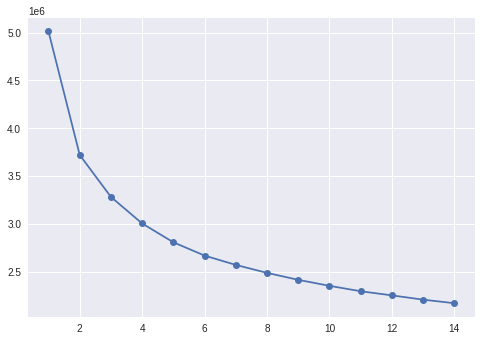

In [23]:
from sklearn.cluster import KMeans
# Chọn 4 nhóm
distance = []
K = range (1,15)
for k in K : 
    k_mean = KMeans(n_clusters=k)
    k_mean.fit(df_ST_train)
    distance.append(k_mean.inertia_)
plt.plot(K,distance,marker='o');

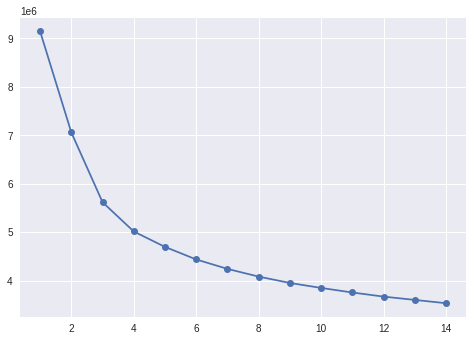

In [24]:
# Chọn 4 nhóm
distance = []
K = range (1,15)
for k in K : 
    k_mean = KMeans(n_clusters=k)
    k_mean.fit(df_CM_train)
    distance.append(k_mean.inertia_)
plt.plot(K,distance,marker='o');

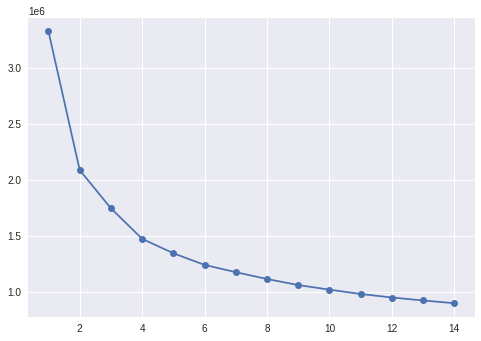

In [25]:
# Chọn 4 nhóm
distance = []
K = range (1,15)
for k in K : 
    k_mean = KMeans(n_clusters=k)
    k_mean.fit(df_CB_train)
    distance.append(k_mean.inertia_)
plt.plot(K,distance,marker='o');

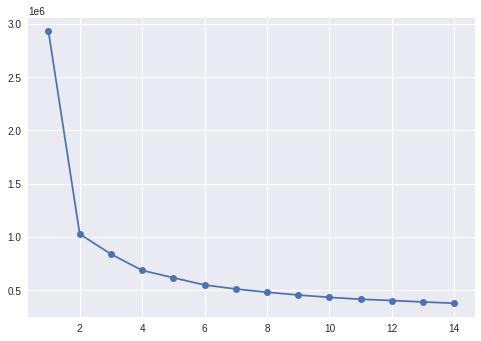

In [26]:
# Chọn 2 nhóm
from sklearn.cluster import KMeans
from sklearn import metrics

distance = []
K = range (1,15)
for k in K : 
    k_mean = KMeans(n_clusters=k)
    k_mean.fit(df_GK_train)
    distance.append(k_mean.inertia_)
plt.plot(K,distance,marker='o');

### Train model

In [27]:
k_mean_ST = KMeans(n_clusters=4)
model_ST = k_mean_ST.fit(df_ST_train)
result_ST = k_mean_ST.labels_
result_ST[:20]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [28]:
k_mean_CM = KMeans(n_clusters=4)
model_CM = k_mean_CM.fit(df_CM_train)
result_CM = k_mean_CM.labels_
result_CM[:20]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [29]:
k_mean_CB = KMeans(n_clusters=3)
model_CB = k_mean_CB.fit(df_CB_train)
result_CB = k_mean_CB.labels_
result_CB[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [30]:
k_mean_GK = KMeans(n_clusters=2)
model_GK = k_mean_GK.fit(df_GK_train)
result_GK = k_mean_GK.labels_
result_GK[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

### Save model

In [31]:
import joblib
joblib.dump(model_ST, '/content/drive/MyDrive/DS105/source/model/model_ST_K-means-4.sav')
joblib.dump(model_CM, '/content/drive/MyDrive/DS105/source/model/model_CM_K-means-4.sav')
joblib.dump(model_CB, '/content/drive/MyDrive/DS105/source/model/model_CB_K-means-3.sav')
joblib.dump(model_GK, '/content/drive/MyDrive/DS105/source/model/model_GK_K-means-3.sav')

['/content/drive/MyDrive/DS105/source/model/model_GK_K-means-3.sav']

In [32]:
df_ST['cluster_KMeans'] = result_ST
df_CM['cluster_KMeans'] = result_CM
df_CB['cluster_KMeans'] = result_CB
df_GK['cluster_KMeans'] = result_GK

## Hierarchical

### Chọn số cluster
lấy mức chấp nhận được là <600

In [33]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

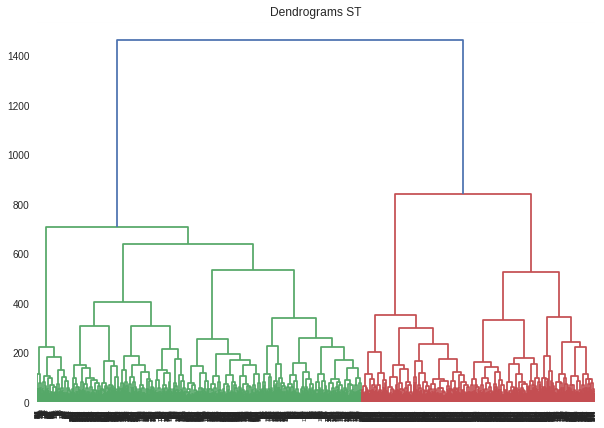

In [34]:
# 5 nhóm
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms ST")  
dend = shc.dendrogram(shc.linkage(df_ST_train, method='ward'))

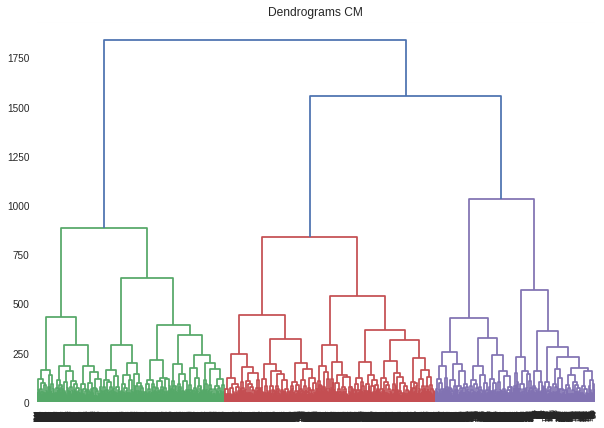

In [35]:
# 6 nhóm
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms CM")  
dend = shc.dendrogram(shc.linkage(df_CM_train, method='ward'))

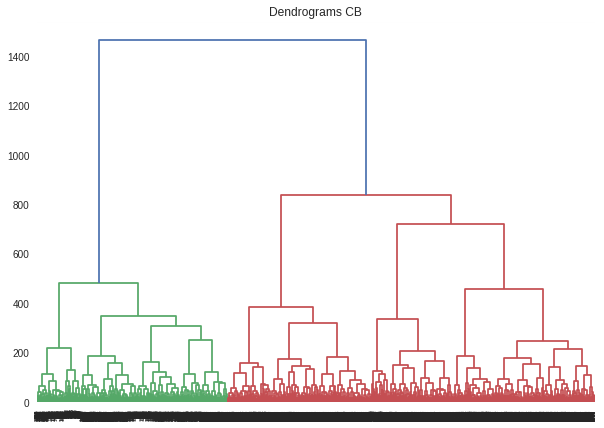

In [36]:
# 4 nhóm
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms CB")  
dend = shc.dendrogram(shc.linkage(df_CB_train, method='ward'))

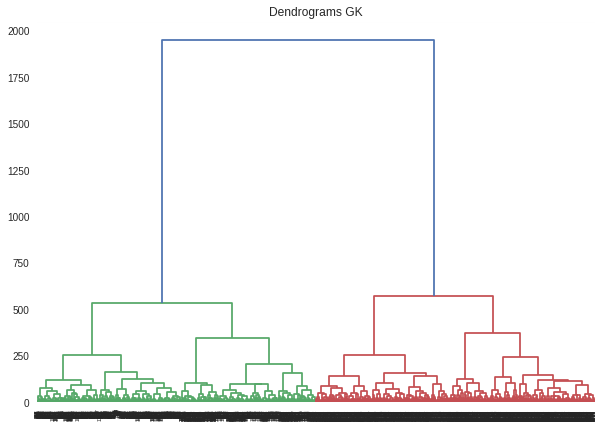

In [37]:
# 2 nhóm
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms GK")  
dend = shc.dendrogram(shc.linkage(df_GK_train, method='ward'))

### Train model

In [40]:
cluster_ST = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
result_ST = cluster_ST.fit_predict(df_ST_train)

In [41]:
cluster_CM = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
result_CM = cluster_CM.fit_predict(df_CM_train)

In [42]:
cluster_CB = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
result_CB = cluster_CB.fit_predict(df_CB_train)

In [43]:
cluster_GK = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
result_GK = cluster_GK.fit_predict(df_GK_train)

### Save model

In [44]:
import joblib
joblib.dump(cluster_ST, '/content/drive/MyDrive/DS105/source/model/model_ST_Hierarchical-5.sav')
joblib.dump(cluster_CM, '/content/drive/MyDrive/DS105/source/model/model_CM_Hierarchical-6.sav')
joblib.dump(cluster_CB, '/content/drive/MyDrive/DS105/source/model/model_CB_Hierarchical-4.sav')
joblib.dump(cluster_GK, '/content/drive/MyDrive/DS105/source/model/model_GK_Hierarchical-2.sav')

['/content/drive/MyDrive/DS105/source/model/model_GK_Hierarchical-2.sav']

In [45]:
df_ST['cluster_Hierarchical'] = result_ST
df_CM['cluster_Hierarchical'] = result_CM
df_CB['cluster_Hierarchical'] = result_CB
df_GK['cluster_Hierarchical'] = result_GK

In [46]:
df_ST.to_csv('/content/drive/MyDrive/DS105/source/dataset/dataset_predict/df_ST.csv', index=False)
df_CM.to_csv('/content/drive/MyDrive/DS105/source/dataset/dataset_predict/df_CM.csv', index=False)
df_CB.to_csv('/content/drive/MyDrive/DS105/source/dataset/dataset_predict/df_CB.csv', index=False)
df_GK.to_csv('/content/drive/MyDrive/DS105/source/dataset/dataset_predict/df_GK.csv', index=False)

## SVM

### Train model

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [48]:
svm_ST = SVC()
svm_CM = SVC()
svm_CB = SVC()
svm_GK = SVC()

svm_ST.fit(df_ST_train, df_ST['cluster_Hierarchical'])
svm_CM.fit(df_CM_train, df_CM['cluster_Hierarchical'])
svm_CB.fit(df_CB_train, df_CB['cluster_Hierarchical'])
svm_GK.fit(df_GK_train, df_GK['cluster_Hierarchical'])

SVC()

In [49]:
y_pred_ST = svm_ST.predict(df_ST_train)
y_pred_CM = svm_CM.predict(df_CM_train)
y_pred_CB = svm_CB.predict(df_CB_train)
y_pred_GK = svm_GK.predict(df_GK_train)

In [50]:
print('Model accuracy score svm ST: {0:0.4f}'. format(accuracy_score(df_ST['cluster_Hierarchical'], y_pred_ST)))
print('Model accuracy score svm CM: {0:0.4f}'. format(accuracy_score(df_CM['cluster_Hierarchical'], y_pred_CM)))
print('Model accuracy score svm CB: {0:0.4f}'. format(accuracy_score(df_CB['cluster_Hierarchical'], y_pred_CB)))
print('Model accuracy score svm GK: {0:0.4f}'. format(accuracy_score(df_GK['cluster_Hierarchical'], y_pred_GK)))

Model accuracy score svm ST: 0.8613
Model accuracy score svm CM: 0.8808
Model accuracy score svm CB: 0.9125
Model accuracy score svm GK: 1.0000


### Save model

In [51]:
import joblib
joblib.dump(svm_ST, '/content/drive/MyDrive/DS105/source/model/model_SVM_ST.sav')
joblib.dump(svm_CM, '/content/drive/MyDrive/DS105/source/model/model_SVM_CM.sav')
joblib.dump(svm_CB, '/content/drive/MyDrive/DS105/source/model/model_SVM_CB.sav')
joblib.dump(svm_GK, '/content/drive/MyDrive/DS105/source/model/model_SVM_GK.sav')

['/content/drive/MyDrive/DS105/source/model/model_SVM_GK.sav']